<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E9%82%8F%E8%BC%AF%E8%BF%B4%E6%AD%B8/cancer%E8%AA%AA%E6%98%8E3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
%pip install wget mglearn

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=e2d0fac4f936ea9c102e4b85891c575604fcf63567d3166e94dd90a6502d2502
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


### 檢視威斯康辛州乳癌資料集

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

# 載入資料集
cancer = load_breast_cancer()

# 建立特徵名稱的中文對照字典
feature_names_zh = {
    'mean radius': '平均半徑',
    'mean texture': '平均紋理',
    'mean perimeter': '平均周長',
    'mean area': '平均面積',
    'mean smoothness': '平均平滑度',
    'mean compactness': '平均緊密度',
    'mean concavity': '平均凹度',
    'mean concave points': '平均凹點',
    'mean symmetry': '平均對稱性',
    'mean fractal dimension': '平均分形維度',
    'radius error': '半徑誤差',
    'texture error': '紋理誤差',
    'perimeter error': '周長誤差',
    'area error': '面積誤差',
    'smoothness error': '平滑度誤差',
    'compactness error': '緊密度誤差',
    'concavity error': '凹度誤差',
    'concave points error': '凹點誤差',
    'symmetry error': '對稱性誤差',
    'fractal dimension error': '分形維度誤差',
    'worst radius': '最差半徑',
    'worst texture': '最差紋理',
    'worst perimeter': '最差周長',
    'worst area': '最差面積',
    'worst smoothness': '最差平滑度',
    'worst compactness': '最差緊密度',
    'worst concavity': '最差凹度',
    'worst concave points': '最差凹點',
    'worst symmetry': '最差對稱性',
    'worst fractal dimension': '最差分形維度'
}

# 建立DataFrame
df = pd.DataFrame(cancer.data, columns=[f"{v}特徵{i}" for i, v in enumerate(feature_names_zh.values())])

# 加入target欄位
df['label'] = cancer.target

# 顯示DataFrame的前幾筆資料
display(df.head())
display(df.shape)

,平均半徑特徵0,平均紋理特徵1,平均周長特徵2,平均面積特徵3,平均平滑度特徵4,平均緊密度特徵5,平均凹度特徵6,平均凹點特徵7,平均對稱性特徵8,平均分形維度特徵9,...,最差紋理特徵21,最差周長特徵22,最差面積特徵23,最差平滑度特徵24,最差緊密度特徵25,最差凹度特徵26,最差凹點特徵27,最差對稱性特徵28,最差分形維度特徵29,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


(569, 31)

In [2]:
import wget

wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

In [4]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

- 這兩個模型得出了類似的決策邊界。請注意，兩者都對兩個點進行了錯誤分類。預設情況下，這兩個模型都應用 L2 正規化，就像 Ridge 對迴歸所做的那樣。
- 對於 LogisticRegression 和 LinearSVC，決定正規化強度的權衡參數稱為 C，C 值越高，正規化程度越低,LogisticRegression 和 LinearSVC 盡可能嘗試擬合訓練集，而當參數 C 的值較低時，模型更專注於尋找接近零的係數向量 (w)。
- 參數 C 如何發揮作用還有另一個有趣的面向。使用較低的 C 值將導致演算法嘗試適應「大多數」資料點，而使用較高的 C 值則強調對每個單獨的資料點進行分類的重要性。

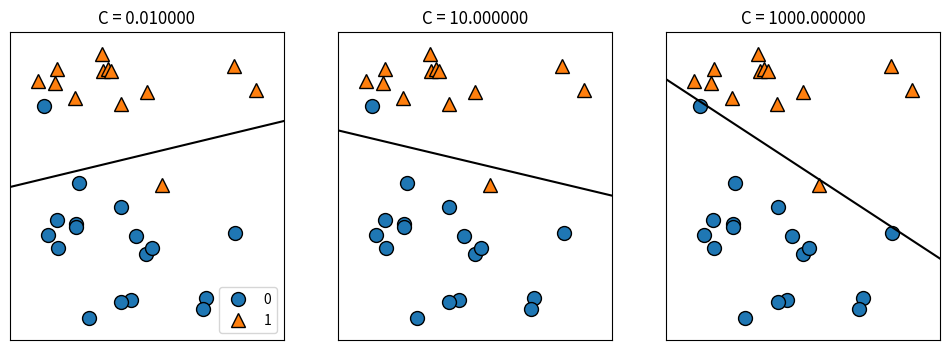

In [5]:
import mglearn
mglearn.plots.plot_linear_svc_regularization()

## 使用特徵比較多的威斯康辛州乳癌資料集

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# Scale the data 將數據進行標準化,請參考說明1,說明2
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logreg = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train) #請參考說明3
print("訓練時的分數:{:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("測試時的分數:{:.3f}".format(logreg.score(X_test_scaled, y_test)))

訓練時的分數:0.988
測試時的分數:0.986


數據標準化（Standardization）是一個重要的數據預處理步驟，讓我解釋為什麼需要標準化：

### 1. 特徵尺度統一
- 不同特徵可能有不同的量綱和範圍
- 例如：
  - 年齡：範圍可能是 0-100
  - 收入：範圍可能是 0-1000000
  - 這種差異會影響模型的學習效果

### 2. 提高模型性能
- 許多機器學習算法對特徵的尺度很敏感
- 標準化後的特徵：
  - 均值為 0
  - 標準差為 1
  - 使模型更容易收斂
  - 提高訓練速度和準確性

### 3. 避免數值問題
- 防止數值計算中的溢出或下溢
- 減少計算誤差
- 提高數值穩定性

### 4. 適用於特定算法
- 邏輯迴歸
- 神經網絡
- 支持向量機（SVM）
- 主成分分析（PCA）
- 這些算法都對特徵尺度敏感

### 5. 標準化的方法
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

#### 標準化公式：
#### $$ z = \frac{x - \mu}{\sigma} $$
#### 其中：
#### - $x$ 是原始值
#### - $\mu$ 是均值
#### - $\sigma$ 是標準差

### 6. 注意事項
- 只對訓練集進行 `fit_transform()`
- 對測試集只進行 `transform()`
- 保持訓練集和測試集的標準化一致性
- 某些算法（如決策樹）不需要標準化

### 7. 優點
- 提高模型穩定性
- 加快收斂速度(收斂速度是指模型在訓練過程中達到最優解的快慢程度)
- 提高預測準確性
- 使特徵具有可比性

### 8. 缺點
- 可能丟失一些原始數據的分布信息
- 對異常值敏感
- 在某些情況下可能不是最佳選擇

總的來說，標準化是機器學習中一個重要的預處理步驟，能夠顯著提高模型的性能和穩定性。


## 說明2
#### `fit_transform()`
- 這個方法會**同時執行兩個步驟**：
  1. **fit (擬合)**：計算訓練數據的統計量（平均值和標準差）
  2. **transform (轉換)**：使用計算出的統計量來標準化數據
  
- 主要用於**訓練數據集**
- 只能在訓練集上使用一次

#### `transform()`
- 只執行**轉換步驟**
- 使用之前 `fit_transform` 時計算好的統計量來進行標準化
- 用於**測試數據集**
- 可以重複使用在不同的數據集上

#### 為什麼要這樣區分？
1. **數據洩漏問題**：
   - 如果在測試集上使用 `fit_transform()`，會導致模型看到測試數據的分布，造成數據洩漏
   - 正確做法是只用訓練集的統計量來轉換測試集

2. **一致性**：
   - 確保測試集使用相同的縮放參數
   - 保持訓練集和測試集的轉換標準一致

## 說明3
max_iter的意思?
1. 優化過程
   - 邏輯迴歸使用梯度下降等優化算法來找到最佳的模型參數
   - 每次迭代都是調整模型參數的一個步驟
   - 目標是最小化損失函數（通常是對數損失）
2. 完整數據集的使用
   - 在每次迭代中，算法都會使用完整的訓練數據集
   - 這表示在一次迭代中，所有訓練樣本都被用來更新模型參數

3. 停止條件
   - 當算法達到收斂（模型參數幾乎不再變化）時會提前停止
   - 如果達到 max_iter 設定的1000次仍未收斂，則強制停止

In [7]:
## 調整c參數
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# Scale the data 將數據進行標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#C的default值是
logreg100 = LogisticRegression(max_iter=1000,C=100).fit(X_train_scaled, y_train)
print("訓練時的分數:{:.3f}".format(logreg100.score(X_train_scaled, y_train)))
print("測試時的分數:{:.3f}".format(logreg100.score(X_test_scaled, y_test)))

訓練時的分數:0.998
測試時的分數:0.944


In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.965


/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.965


/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


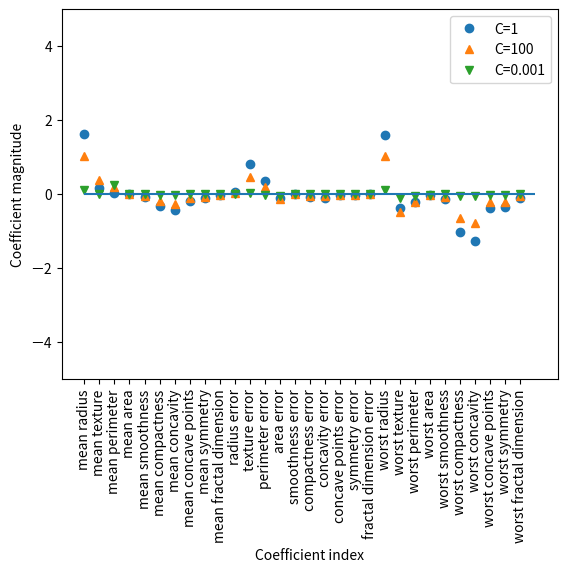

In [11]:
import matplotlib.pyplot as plt
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T,'^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

#=======
#C值愈小,w愈接近0

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


/opt/conda/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


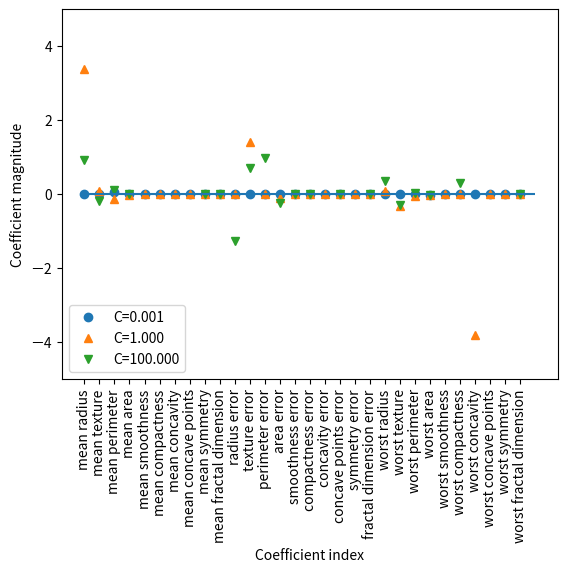

In [12]:
for C, marker in zip([0.001, 1, 100], ['o','^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

In [13]:
## 調整c參數同時調整l1
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# Scale the data 將數據進行標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#C的default值是
logreg100 = LogisticRegression(max_iter=1000,C=100,penalty="l1", solver='liblinear').fit(X_train_scaled, y_train)
print("訓練時的分數:{:.3f}".format(logreg100.score(X_train_scaled, y_train)))
print("測試時的分數:{:.3f}".format(logreg100.score(X_test_scaled, y_test)))

訓練時的分數:1.000
測試時的分數:0.944
